## simple single point coronavirus predictions
#### using jhu covid data

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

loading data

In [39]:
datapath = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "World Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [40]:
covid_df = pd.read_csv(datapath)

In [41]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,96


In [42]:
abridged_covid_df = covid_df.loc[:,'3/22/20':]

In [43]:
abridged_covid_df.index

RangeIndex(start=0, stop=266, step=1)

In [44]:
abridged_covid_df.index = covid_df['Country/Region']

In [45]:
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,40,40,74,84,94,110,110,120,170,174,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
Albania,89,104,123,146,174,186,197,212,223,243,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
Algeria,201,230,264,302,367,409,454,511,584,716,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
Andorra,113,133,164,188,224,267,308,334,370,376,...,764,765,844,851,852,852,852,852,852,852
Angola,2,3,3,3,4,4,5,7,7,7,...,86,86,86,86,86,86,88,91,92,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,...,483,484,484,484,485,499,499,513,513,514
Yemen,0,0,0,0,0,0,0,0,0,0,...,323,354,399,419,453,469,482,484,496,524
Comoros,0,0,0,0,0,0,0,0,0,0,...,106,106,132,132,132,132,141,141,141,141


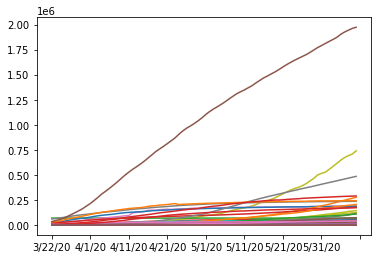

In [46]:
abridged_covid_df.T.plot(legend=False)

In [47]:
abridged_covid_df = abridged_covid_df.sort_values(by=['6/9/20'], ascending=False)
abridged_covid_df = abridged_covid_df.iloc[1:140,:]
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,...,514849,526447,555383,584016,614941,645771,672846,691758,707412,739503
Russia,367,438,495,658,840,1036,1264,1534,1836,2337,...,405843,414328,423186,431715,440538,449256,458102,467073,476043,484630
United Kingdom,5683,6650,8077,9529,11658,14543,17089,19522,22141,25150,...,274762,276332,277985,279856,281661,283311,284868,286194,287399,289140
India,396,499,536,657,727,887,987,1024,1251,1397,...,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146
Spain,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,...,239479,239638,239932,240326,240660,240978,241310,241550,241717,241966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,484,484,484,484,484,484,484,484,484,484,...,945,945,945,947,947,947,947,947,947,947
China,936,936,936,936,936,936,936,937,937,937,...,937,937,937,932,932,932,932,932,932,932
Burkina Faso,75,99,114,146,152,180,207,222,246,261,...,847,847,881,884,885,888,888,889,890,891


In [48]:
abridged_covid_df = abridged_covid_df.sample(frac=1)
flattened_df = abridged_covid_df.to_numpy().flatten()
covid_data = flattened_df
num_regions = abridged_covid_df.shape[0]; print(num_regions)
num_days = abridged_covid_df.shape[1]; print(num_days)

139
80


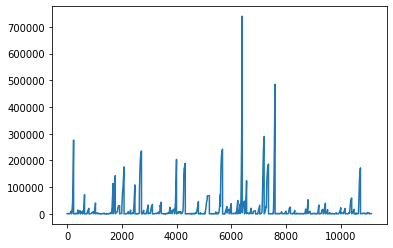

In [49]:
plt.plot(covid_data)
plt.show()

In [50]:
train_end_index = int(len(covid_data) * 0.8) ; train_end_index # about 70 percent for training

8896

In [51]:
# this code is directly from https://www.tensorflow.org/tutorials/structured_data/time_series

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
    
  return np.array(data), np.array(labels)

In [52]:
# time to scale these features and standardize using training data

train_data_mean = covid_data[:train_end_index].mean()
train_data_std = covid_data[:train_end_index].std()
print(train_data_mean, train_data_std)
covid_data = (covid_data - train_data_mean)/train_data_std

covid_data = covid_data + 0.0

19261.218974820145 52255.66603554376


In [53]:
# choose {covid_past_history} vals to use to predict {covid_future_target + 1} vals into the future
covid_past_history = 20
covid_future_target = 0

x_train_covid, y_train_covid = univariate_data(covid_data, 0, train_end_index, covid_past_history, covid_future_target)

x_val_covid, y_val_covid = univariate_data(covid_data, train_end_index, None, covid_past_history, covid_future_target)

In [54]:
print(x_train_covid.shape, y_train_covid.shape)
print(x_train_covid.shape[-2:])

(8876, 20, 1) (8876,)
(20, 1)


In [55]:
print(x_val_covid.shape, y_val_covid.shape)

(2204, 20, 1) (2204,)


### Need to clean this training data up for it to work with this covid data, removing the bogus sequences

In [56]:
def clean_data_covid(x_data, y_data, num_days, history):
    index = num_days - history
    index_range = np.array([])
    
    while index < len(x_data):
        index_range = np.append(index_range, np.arange(index, index + history))
        index = index + history + num_days
    
    x_data = np.delete(x_data, index_range.astype(int), 0)
    y_data = np.delete(y_data, index_range.astype(int), 0)
    
    return x_data, y_data

In [57]:
x_train_covid, y_train_covid = clean_data_covid(x_train_covid, y_train_covid, 
                                                num_days, covid_past_history)

/Users/tamjeedazad/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':
/Users/tamjeedazad/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.


Past history example:
 [[-0.27296981]
 [-0.26942952]
 [-0.26585096]
 [-0.26223413]
 [-0.25907657]
 [-0.25586161]
 [-0.25249356]
 [-0.24893413]
 [-0.2453173 ]
 [-0.24173874]
 [-0.2380645 ]
 [-0.23427544]
 [-0.23079256]
 [-0.2274245 ]
 [-0.22426695]
 [-0.22070753]
 [-0.21707156]
 [-0.21333991]
 [-0.20964653]
 [-0.2058766 ]]
using this history to predict the val:  -0.20216408623773877


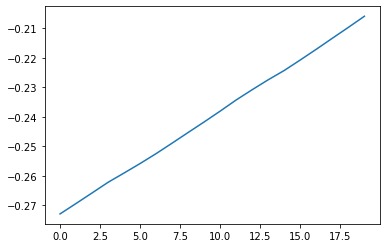

In [58]:
index = 105
print("Past history example:\n", x_train_covid[index])
print("using this history to predict the val: ", y_train_covid[index])
plt.plot(x_train_covid[index])

In [59]:
# much of below code is derived from https://www.tensorflow.org/tutorials/structured_data/time_series

BATCH_SIZE = num_days

train_covid = tf.data.Dataset.from_tensor_slices((x_train_covid, y_train_covid))
train_covid = train_covid.cache().batch(BATCH_SIZE).repeat()

val_covid = tf.data.Dataset.from_tensor_slices((x_val_covid, y_val_covid))
val_covid = val_covid.batch(BATCH_SIZE).repeat()

In [62]:
# creating the neural network model

lstm_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=x_train_covid.shape[-2:]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [63]:
lstm_prediction_model.compile(optimizer='adam', loss='mae')

In [64]:
lstm_prediction_model.fit(train_covid, epochs=15, steps_per_epoch=150, validation_data=val_covid, validation_steps=50)

Train for 150 steps, validate for 50 steps
Epoch 1/15
150/150 [==============================] - 13s 89ms/step - loss: 0.0854 - val_loss: 0.0552
Epoch 2/15
150/150 [==============================] - 10s 68ms/step - loss: 0.0506 - val_loss: 0.0254
Epoch 3/15
150/150 [==============================] - 10s 69ms/step - loss: 0.0472 - val_loss: 0.0129
Epoch 4/15
150/150 [==============================] - 11s 70ms/step - loss: 0.0427 - val_loss: 0.0246
Epoch 5/15
150/150 [==============================] - 11s 70ms/step - loss: 0.0355 - val_loss: 0.0174
Epoch 6/15
150/150 [==============================] - 10s 70ms/step - loss: 0.0458 - val_loss: 0.0135
Epoch 7/15
150/150 [==============================] - 11s 70ms/step - loss: 0.0370 - val_loss: 0.0142
Epoch 8/15
150/150 [==============================] - 11s 71ms/step - loss: 0.0402 - val_loss: 0.0144
Epoch 9/15
150/150 [==============================] - 11s 71ms/step - loss: 0.0477 - val_loss: 0.0112
Epoch 10/15
150/150 [==================

In [65]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

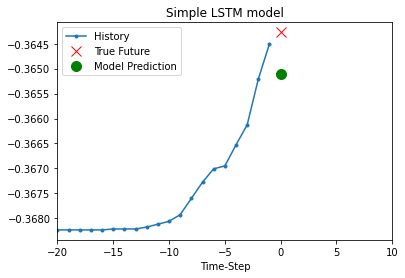

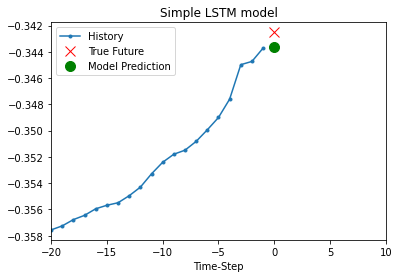

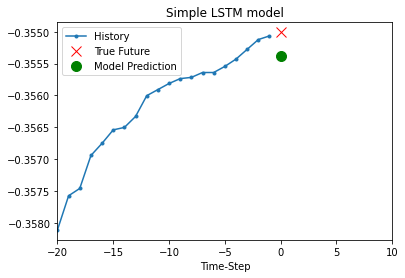

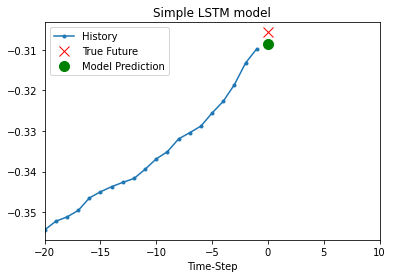

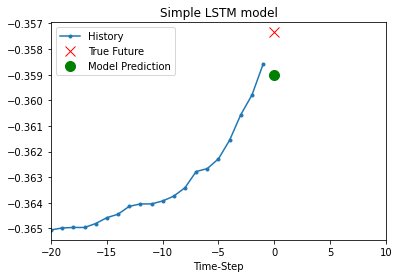

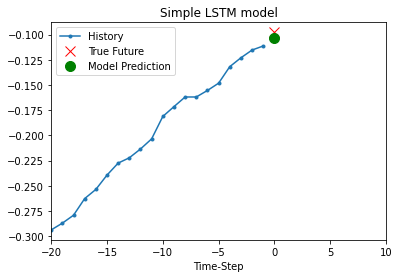

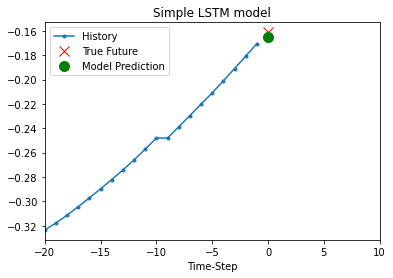

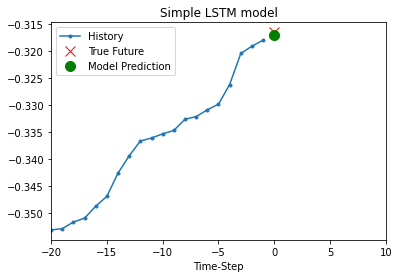

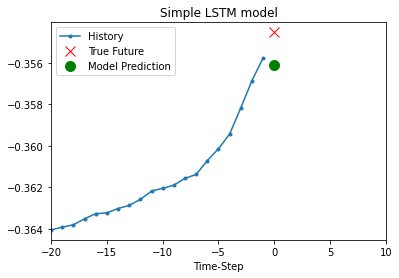

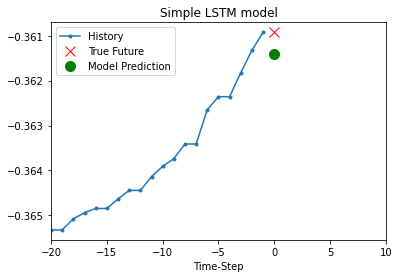

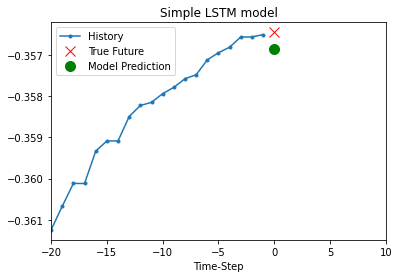

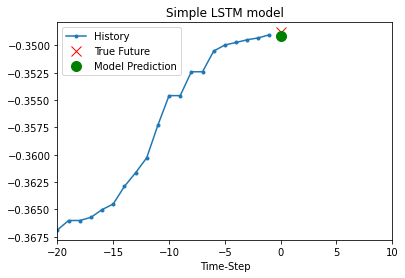

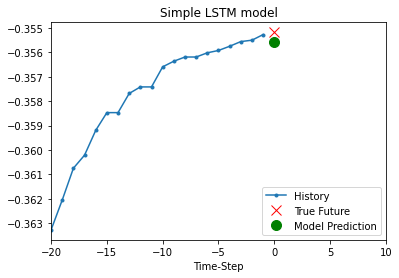

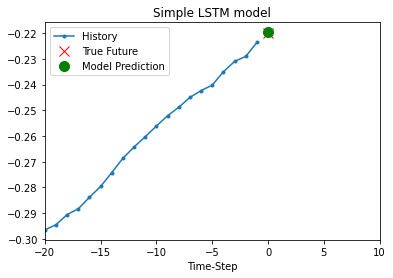

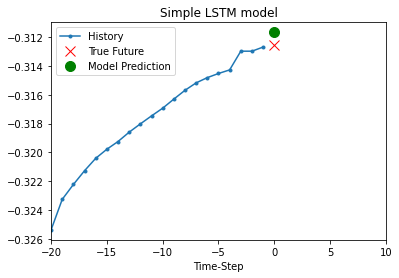

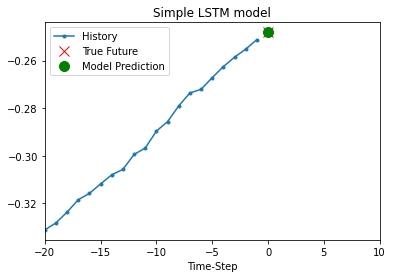

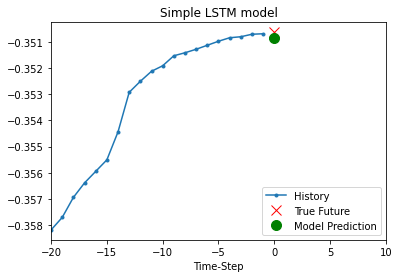

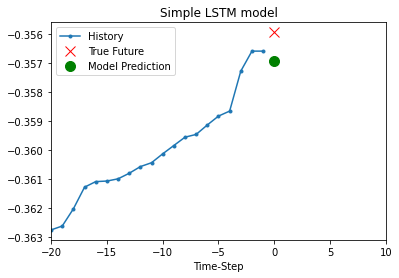

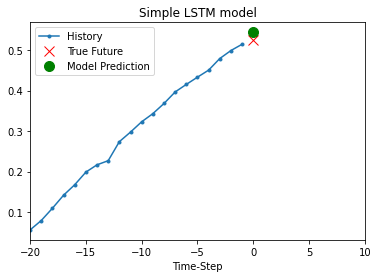

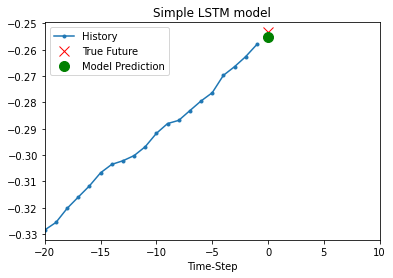

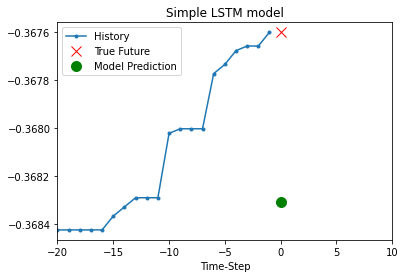

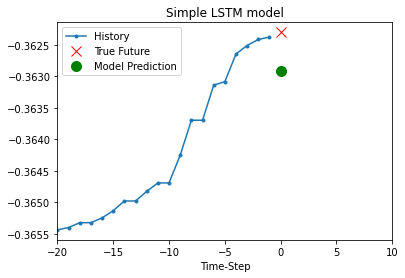

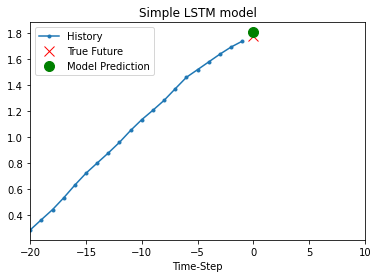

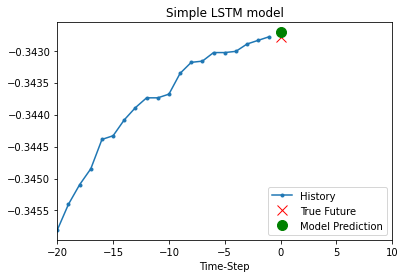

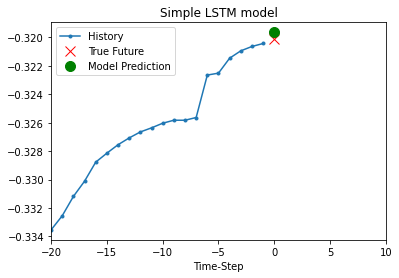

In [66]:
for x, y in val_covid.take(25):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    lstm_prediction_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()